### 西瓜书笔记
个人感觉老师是视频和资源对svm的讲解是直切入主题，讲的是重点。但是对svm的一些基本概念和推导并没有做一些介绍，建议可以结合西瓜书来学习svm，下面是学习西瓜书的一些笔记，重基本概念
<img src='pic/xigua_note_1.jpg' width=50% height=50%>
<img src='pic/xigua_note_2.jpg' width=50% height=50%>
<img src='pic/xigua_note_3.jpg' width=50% height=50%>
<br>

下面是吴恩达老师介绍的部分，使用的sklearn的svm进行测验，主要是理解svm的核心概念，并没有对算法进行实现

In [35]:
### Part 1: Loading and Visualizing Data

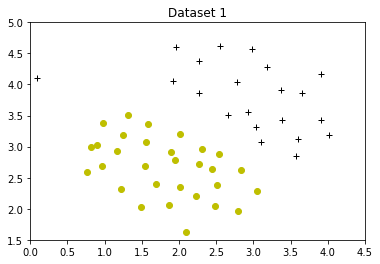

In [5]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

from plot_data import plot_data


# Load from ex6data1
mat_data = sio.loadmat('data/ex6data1.mat')
X = mat_data['X']
y = mat_data['y'].ravel()

# Plot training data
plt.figure()
plot_data(X, y)
plt.xlim([0, 4.5])
plt.ylim([1.5, 5])
plt.title("Dataset 1")
plt.show()

### Part 2: Training Linear SVM
In ex6data1.mat, most of the positive and negative examples can be seperated by a single line. Train SVM with linear kernel with C = 1 and plot the decision boundary:

score: 0.980392156863


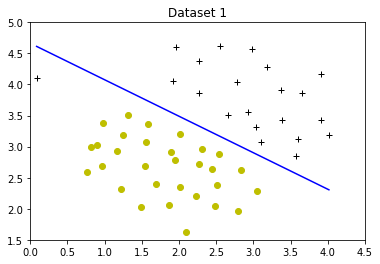

In [15]:
from sklearn import svm

from visualize_boundary_linear import visualize_boundary_linear


# Change the C value below and see how the decision boundary varies (e.g., try C = 1000).
C = 1
clf = svm.LinearSVC(C=C)
clf.fit(X, y)
print 'score:', clf.score(X, y)

plt.figure()
visualize_boundary_linear(X, y, clf)
plt.xlim([0, 4.5])
plt.ylim([1.5, 5])
plt.title("Dataset 1")
plt.show()

### Part 3: Implementing Gaussian Kernel
The gaussian_kernel() returns the similarity between x1 and x2 using a Gaussian kernel. <br>


In [16]:
def gaussian_kernel(x1, x2, sigma):
    """
    Returns the similarity between x1 and x2 using a Gaussian kernel.

    """
    return np.exp(-np.sum(np.square(x1 - x2)) / (2.0 * sigma ** 2))

x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
sim = gaussian_kernel(x1, x2, sigma)

print 'Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = {}: \n\t{}\n' \
      '(for sigma = 2, this value should be about 0.324652)'.format(sigma, sim)

Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2: 
	0.324652467358
(for sigma = 2, this value should be about 0.324652)


### Part 4: Visualizing Dataset 2
Load and visualizing the data from ex6data2.mat:

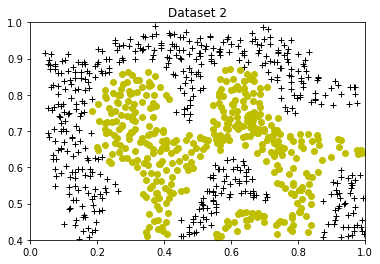

In [18]:
# Load from ex6data2
mat_data = sio.loadmat('data/ex6data2.mat')
X = mat_data['X']
y = mat_data['y'].ravel()

# Plot training data
plt.figure()
plot_data(X, y)
plt.xlim([0, 1])
plt.ylim([0.4, 1])
plt.title("Dataset 2")
plt.show()

可见，非线性可分的数据，就没有办法使用线性方程了，kernel就出现了 <br>
原理：高斯kernel，将低维坐标映射为高维坐标，在高维空间找到切面进行数据的划分，当然这个数据证明过程可以查看其他资料。<br>
高斯三维图可以看见越靠近landmark的点，映射值就越接近1，远离landmrk的点，映射值越接近0 <br>
步骤：<br>
1.确定landmarks，ppt上有介绍，一般会将所有点都处理为landmarks <br>
2.确定方差值，此值越大，越扁平，当然后面会采用多组值的方式选择最优的方差值 <br>
3.计算相似值，也就是将每个x值，和1只能够确定的每一个landmark映射为一个新的高维特征，这样就会映射为m个features <br>
4.然后进行迭代优化，其中判断Theta(T)f(x)>0 是否大于0来判断输出y为0还是1 <br>

### 高斯方程
<img src='pic/gaosi_kernel_fun.png' width=60% height=60%>

### 高斯三维曲线
<img src='pic/gaosi_kernel.png' width=60% height=60%>

### 高斯kernel，最终的h(x)计算方式
<img src='pic/gaosi_kernel_2.png' width=60% height=60%>

### Part 5: Training SVM with RBF Kernel (Dataset 2)
In ex6data2.mat, there is no linear decision boundary that separates the positive and negative examples. Train SVM with Gaussian kernel to learn a non-linear decision boundary and plot the decision boundary:<br>

### Loss fun和 logist regression对比
这里的c是充当1/lambda:正则化参数的作用,可以跟进实际数据进行调整,选优
<img src='pic/svm_loss_fun.png' width=50% height=50%>
<img src='pic/svm_loss_different.png' width=50% height=50%>

score: 0.969872537659


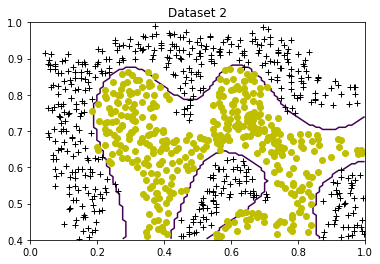

In [27]:
from visualize_boundary import visualize_boundary


# SVM Parameters
C = 100
gamma = 10

clf = svm.SVC(C=C, kernel='rbf', gamma=gamma)
clf.fit(X, y)
print 'score:', clf.score(X, y)

plt.figure()
visualize_boundary(X, y, clf)
plt.xlim([0, 1])
plt.ylim([0.4, 1])
plt.title("Dataset 2")
plt.show()

### Part 6: Visualizing Dataset 3 
Load and visualizing the data from ex6data3.mat:

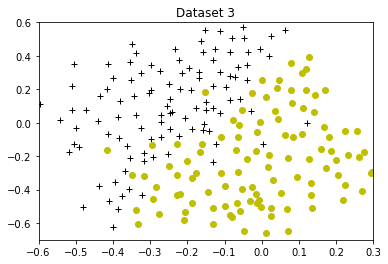

In [29]:
mat_data = sio.loadmat('data/ex6data3.mat')
X = mat_data['X']
y = mat_data['y'].ravel()
X_val = mat_data['Xval']
y_val = mat_data['yval'].ravel()

# Plot training data
plt.figure()
plot_data(X, y)
plt.xlim([-0.6, 0.3])
plt.ylim([-0.7, 0.6])
plt.title("Dataset 3")
plt.show()

### Part 7: Training SVM with RBF Kernel (Dataset 3)
To find the best parameters for SVM, the data3_params() trys differernt combination of C and gamma and returns the best choice of them for SVM with RBF kernel.<br>
在训练集数据上进行训练，得到C和gamma,然后在验证集数据上进行效果验证，最后选出loss最小的C和gamma

In [34]:
def data3_params(X, y, X_val, y_val):
    """
    Returns the best choice of C and gamma for SVM with RBF kernel.
    """
    C_cands = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    gamma_cands = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    max_score = -1
    C_pick = -1
    gamma_pick = -1
    for C in C_cands:
        for gamma in gamma_cands:
            clf = svm.SVC(C=C, kernel='rbf', gamma=gamma)
            clf.fit(X, y)
            score = clf.score(X_val, y_val)
            if score > max_score:
                max_score = score
                C_pick = C
                gamma_pick = gamma

    return C_pick, gamma_pick

Train SVM and plot the decision boundary:

score: 0.965


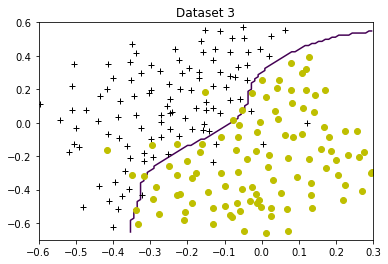

In [31]:
C, gamma = data3_params(X, y, X_val, y_val)

# Train the SVM
clf = svm.SVC(C=C, kernel='rbf', gamma=gamma)
clf.fit(X, y)
print 'score:', clf.score(X_val, y_val)

plt.figure()
visualize_boundary(X, y, clf)
plt.xlim([-0.6, 0.3])
plt.ylim([-0.7, 0.6])
plt.title("Dataset 3")
plt.show()